# Data Exploration for Image Classification

This notebook explores the chosen dataset (CIFAR-10 or Animals10) for image classification.

## Objectives:
- Load and inspect the dataset
- Visualize sample images from each class
- Analyze class distribution
- Understand image dimensions and characteristics
- Plan preprocessing strategy

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.15.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Dataset Selection and Loading

Choose between CIFAR-10 or Animals10 dataset.

In [2]:
# Dataset choice - modify this to switch between datasets
DATASET_CHOICE = "animals10"  # Options: "cifar10" or "animals10"
import kagglehub
print("Download from: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data")
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path) 




# Placeholder - implement Animals10 loading
# data_dir = "../data/animals10/"  
# Load using tf.keras.preprocessing.image_dataset_from_directory

class_names = ['dog', 'cat', 'horse', 'spider', 'butterfly', 
                'chicken', 'sheep', 'cow', 'squirrel', 'elephant']

Download from: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data


/Users/smithn5/ironhack/image_class_project_ih/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/smithn5/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


## 3. Dataset Overview and Statistics

In [3]:
import os
os.listdir(path)


['translate.py', 'raw-img']

In [4]:
# load datasets for exploration animals10
# use image_dataset_from_directory to load the dataset
path


'/Users/smithn5/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2'

In [5]:
# Load the dataset using tf.keras.preprocessing.image.ImageDataGenerator
batch_size = 32
img_height = 64
img_width = 64

# Create ImageDataGenerator with validation split
datacontainer = ImageDataGenerator(
    validation_split=0.1,  # 10% for validation
    rescale=1/255,  # Normalize
    fill_mode='nearest', #intropulotion
    


)

# Create training dataset
train_ds = datacontainer.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="training",
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation dataset
val_ds = datacontainer.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="validation",
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get class names from the dataset
class_names = list(train_ds.class_indices.keys())
print(f"Found {len(class_names)} classes: {class_names}")

# Calculate dataset sizes
print(f"Training samples: {train_ds.samples}")
print(f"Validation samples: {val_ds.samples}")
print(f"Training batches per epoch: {len(train_ds)}")
print(f"Validation batches per epoch: {len(val_ds)}")
print(f"Batch size: {batch_size}")

# Show class indices mapping
print(f"\nClass indices mapping:")
for class_name, index in train_ds.class_indices.items():
    print(f"  {class_name}: {index}")
 

Found 23565 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.
Found 10 classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Training samples: 23565
Validation samples: 2614
Training batches per epoch: 737
Validation batches per epoch: 82
Batch size: 32

Class indices mapping:
  cane: 0
  cavallo: 1
  elefante: 2
  farfalla: 3
  gallina: 4
  gatto: 5
  mucca: 6
  pecora: 7
  ragno: 8
  scoiattolo: 9
Found 2614 images belonging to 10 classes.
Found 10 classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Training samples: 23565
Validation samples: 2614
Training batches per epoch: 737
Validation batches per epoch: 82
Batch size: 32

Class indices mapping:
  cane: 0
  cavallo: 1
  elefante: 2
  farfalla: 3
  gallina: 4
  gatto: 5
  mucca: 6
  pecora: 7
  ragno: 8
  scoiattolo: 9


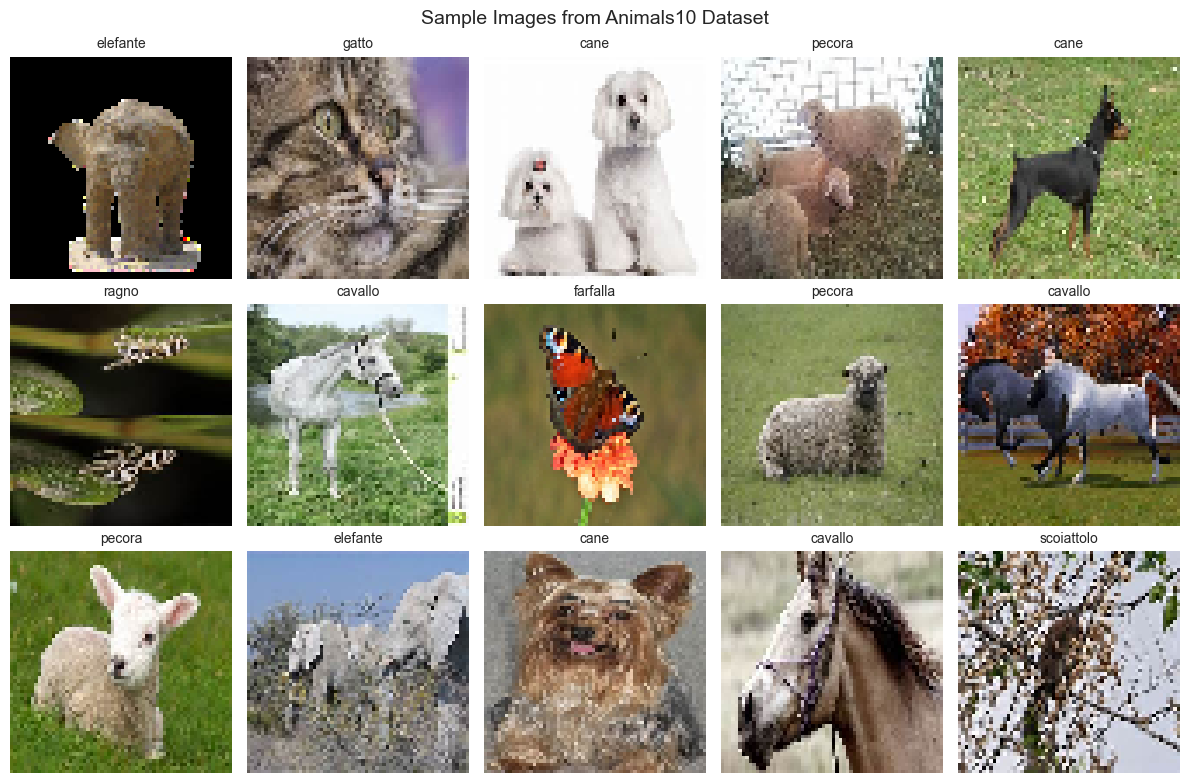


Image statistics:
Image shape: (64, 64, 3)
Data type: float32
Min pixel value: 0.000
Max pixel value: 1.000
Mean pixel value: 0.432
Labels shape: (10,)
Labels type: One-hot encoded (categorical)


In [6]:
# Display sample images from the dataset with their labels
plt.figure(figsize=(12, 8))

# Get one batch from the training dataset
batch_images, batch_labels = next(train_ds)

# Display the first 15 images from the batch
num_images = min(15, len(batch_images))
for i in range(num_images):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Images are already normalized to [0,1] by rescale=1./255
    img = batch_images[i]
    plt.imshow(img)
    
    # Get class name from one-hot encoded label
    class_idx = np.argmax(batch_labels[i])
    class_name = class_names[class_idx]
    plt.title(f'{class_name}', fontsize=10)

plt.suptitle('Sample Images from Animals10 Dataset', fontsize=14)
plt.tight_layout()
plt.show()

# Show pixel value statistics
print(f"\nImage statistics:")
print(f"Image shape: {batch_images[0].shape}")
print(f"Data type: {batch_images.dtype}")
print(f"Min pixel value: {np.min(batch_images):.3f}")
print(f"Max pixel value: {np.max(batch_images):.3f}")
print(f"Mean pixel value: {np.mean(batch_images):.3f}")
print(f"Labels shape: {batch_labels[0].shape}")
print(f"Labels type: One-hot encoded (categorical)")

# Reset the generator for future use
train_ds.reset()

## 4. Class Distribution Analysis

Analyzing class distribution...
Counting training samples...
Counting validation samples...
Counting validation samples...


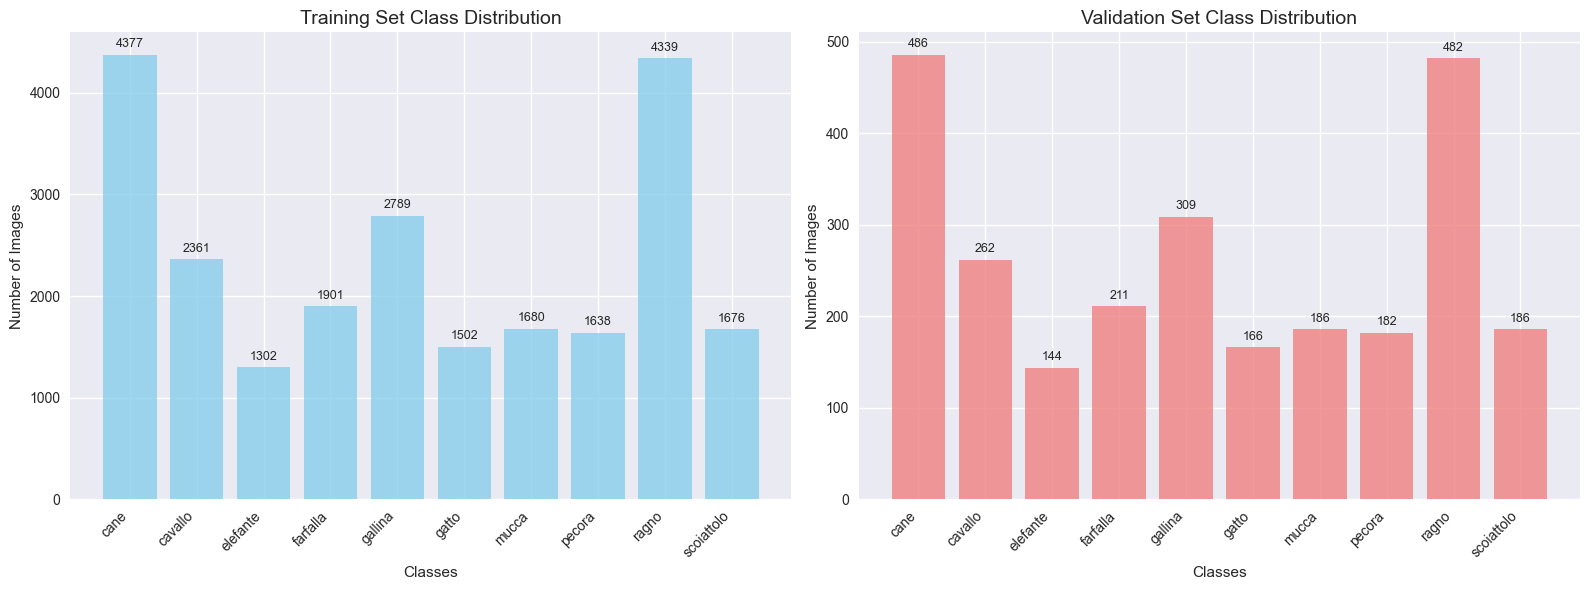


CLASS DISTRIBUTION SUMMARY
Total images: 26179
Training images: 23565 (90.0%)
Validation images: 2614 (10.0%)

Per-class breakdown:
--------------------------------------------------
cane         | Train: 4377 ( 18.6%) | Val:  486 ( 18.6%) | Total: 4863
cavallo      | Train: 2361 ( 10.0%) | Val:  262 ( 10.0%) | Total: 2623
elefante     | Train: 1302 (  5.5%) | Val:  144 (  5.5%) | Total: 1446
farfalla     | Train: 1901 (  8.1%) | Val:  211 (  8.1%) | Total: 2112
gallina      | Train: 2789 ( 11.8%) | Val:  309 ( 11.8%) | Total: 3098
gatto        | Train: 1502 (  6.4%) | Val:  166 (  6.4%) | Total: 1668
mucca        | Train: 1680 (  7.1%) | Val:  186 (  7.1%) | Total: 1866
pecora       | Train: 1638 (  7.0%) | Val:  182 (  7.0%) | Total: 1820
ragno        | Train: 4339 ( 18.4%) | Val:  482 ( 18.4%) | Total: 4821
scoiattolo   | Train: 1676 (  7.1%) | Val:  186 (  7.1%) | Total: 1862


In [7]:
# Analyze class distribution for Animals10 dataset
if DATASET_CHOICE == "animals10":
    print("Analyzing class distribution...")
    
    # Get class counts from the generators
    train_class_counts = [0] * len(class_names)
    val_class_counts = [0] * len(class_names)
    
    # Count training set classes
    print("Counting training samples...")
    train_ds.reset()  # Reset generator to start from beginning
    for i in range(len(train_ds)):
        batch_images, batch_labels = next(train_ds)
        # Convert one-hot labels to class indices and count
        class_indices = np.argmax(batch_labels, axis=1)
        for class_idx in class_indices:
            train_class_counts[class_idx] += 1
    
    # Count validation set classes
    print("Counting validation samples...")
    val_ds.reset()  # Reset generator to start from beginning
    for i in range(len(val_ds)):
        batch_images, batch_labels = next(val_ds)
        # Convert one-hot labels to class indices and count
        class_indices = np.argmax(batch_labels, axis=1)
        for class_idx in class_indices:
            val_class_counts[class_idx] += 1
    
    # Create distribution plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Training set distribution
    bars1 = ax1.bar(range(len(class_names)), train_class_counts, color='skyblue', alpha=0.8)
    ax1.set_title('Training Set Class Distribution', fontsize=14)
    ax1.set_xlabel('Classes')
    ax1.set_ylabel('Number of Images')
    ax1.set_xticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, count in zip(bars1, train_class_counts):
        if count > 0:  # Only show label if there are images
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(train_class_counts)*0.01, 
                    str(count), ha='center', va='bottom', fontsize=9)
    
    # Validation set distribution
    bars2 = ax2.bar(range(len(class_names)), val_class_counts, color='lightcoral', alpha=0.8)
    ax2.set_title('Validation Set Class Distribution', fontsize=14)
    ax2.set_xlabel('Classes')
    ax2.set_ylabel('Number of Images')
    ax2.set_xticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, count in zip(bars2, val_class_counts):
        if count > 0:  # Only show label if there are images
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(val_class_counts)*0.01, 
                    str(count), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*50)
    print("CLASS DISTRIBUTION SUMMARY")
    print("="*50)
    total_train = sum(train_class_counts)
    total_val = sum(val_class_counts)
    total_images = total_train + total_val
    
    print(f"Total images: {total_images}")
    print(f"Training images: {total_train} ({total_train/total_images*100:.1f}%)")
    print(f"Validation images: {total_val} ({total_val/total_images*100:.1f}%)")
    print("\nPer-class breakdown:")
    print("-" * 50)
    
    for i, class_name in enumerate(class_names):
        total_class = train_class_counts[i] + val_class_counts[i]
        train_pct = train_class_counts[i]/total_train*100 if total_train > 0 else 0
        val_pct = val_class_counts[i]/total_val*100 if total_val > 0 else 0
        print(f"{class_name:12} | Train: {train_class_counts[i]:4d} ({train_pct:5.1f}%) | Val: {val_class_counts[i]:4d} ({val_pct:5.1f}%) | Total: {total_class:4d}")
    
    # Reset generators for future use
    train_ds.reset()
    val_ds.reset()

## 5. Sample Image Visualization

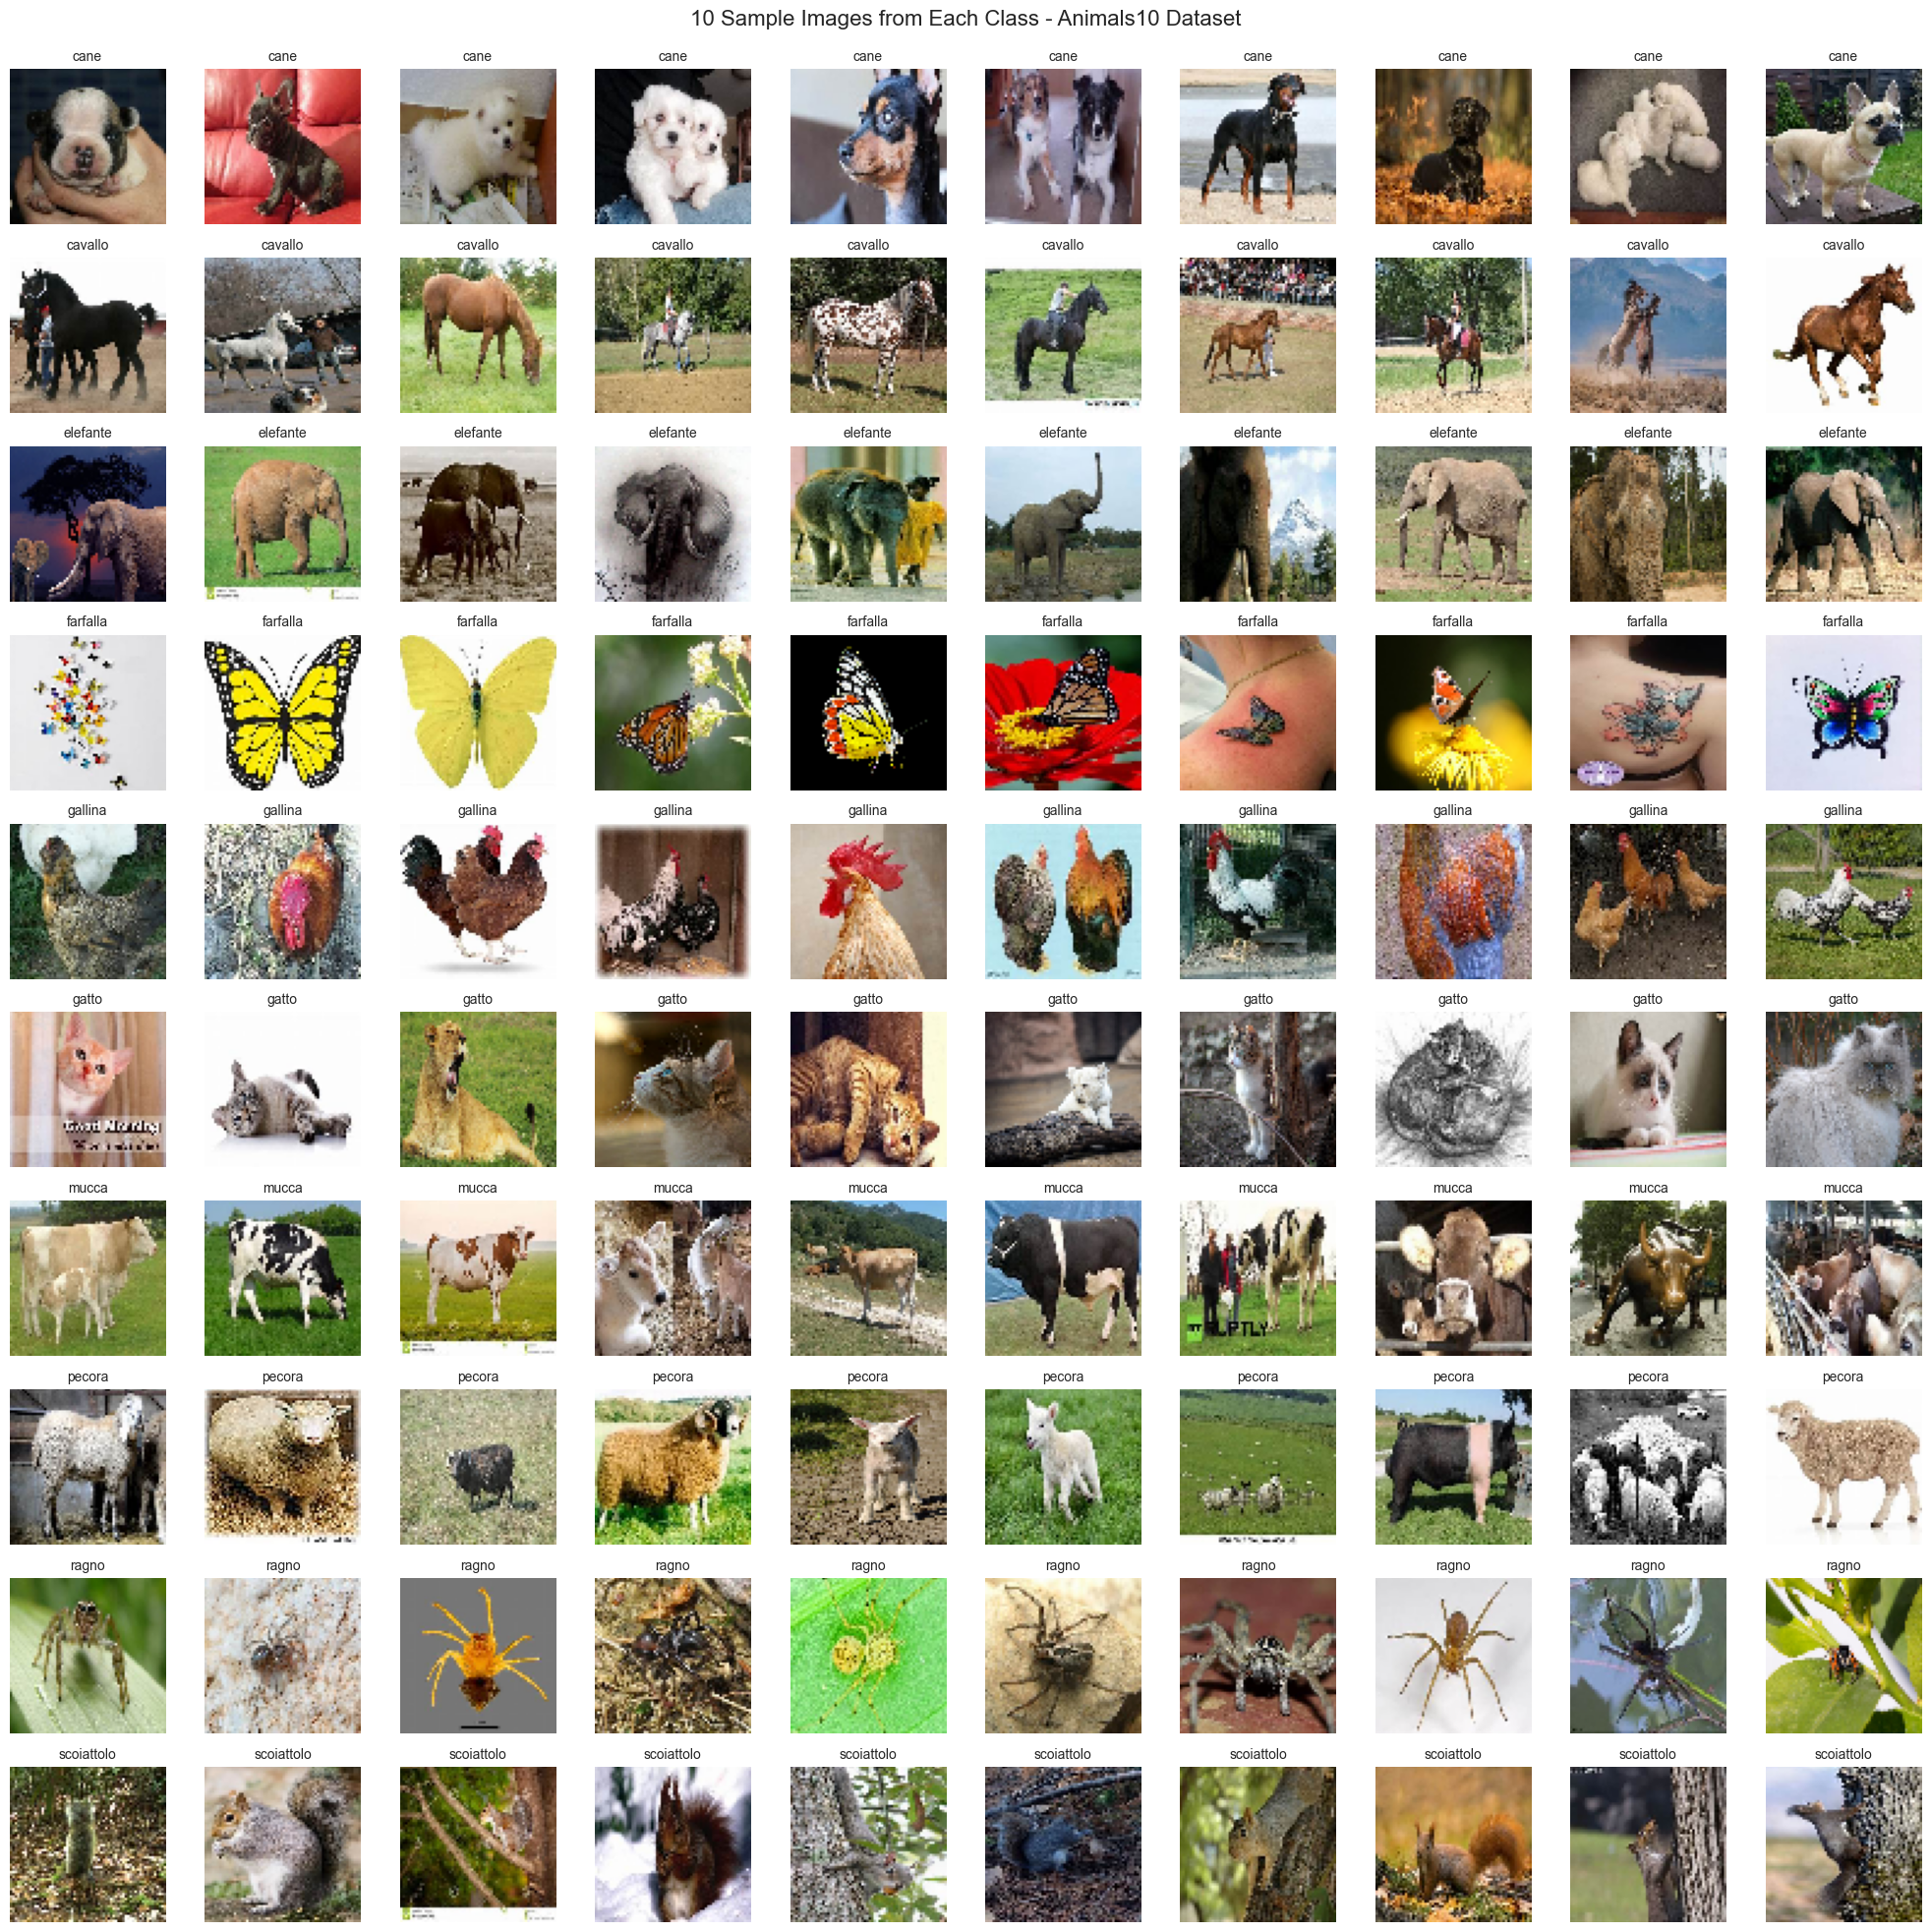


Sample collection summary:
----------------------------------------
cane        : 10/10 samples collected
cavallo     : 10/10 samples collected
elefante    : 10/10 samples collected
farfalla    : 10/10 samples collected
gallina     : 10/10 samples collected
gatto       : 10/10 samples collected
mucca       : 10/10 samples collected
pecora      : 10/10 samples collected
ragno       : 10/10 samples collected
scoiattolo  : 10/10 samples collected


In [8]:
# Show 10 samples from each class
if DATASET_CHOICE == "animals10":
    print("Collecting 10 samples from each class...")
    
    # Dictionary to store images for each class
    class_images = {i: [] for i in range(len(class_names))}
    samples_per_class = 10
    
    # Reset generator and collect samples
    train_ds.reset()
    
    # Collect samples until we have enough for each class
    max_batches = len(train_ds) * 2  # Safety limit
    batch_count = 0
    
    while batch_count < max_batches:
        try:
            batch_images, batch_labels = next(train_ds)
            
            # Process each image in the batch
            for img, label in zip(batch_images, batch_labels):
                class_idx = np.argmax(label)
                
                # Add image if we need more samples for this class
                if len(class_images[class_idx]) < samples_per_class:
                    class_images[class_idx].append(img)
            
            # Check if we have enough samples for all classes
            if all(len(imgs) >= samples_per_class for imgs in class_images.values()):
                break
                
            batch_count += 1
            
        except StopIteration:
            # Reset generator if we reach the end
            train_ds.reset()
            batch_count += 1
    
    # Create a large figure to display all samples
    fig, axes = plt.subplots(len(class_names), samples_per_class, 
                           figsize=(samples_per_class*2, len(class_names)*2))
    
    # Plot samples for each class
    for class_idx, class_name in enumerate(class_names):
        for sample_idx in range(samples_per_class):
            row = class_idx
            col = sample_idx
            
            if len(class_images[class_idx]) > sample_idx:
                img = class_images[class_idx][sample_idx]
                axes[row, col].imshow(img)
                axes[row, col].set_title(f'{class_name}', fontsize=10)
            else:
                # If we don't have enough samples, show empty plot
                axes[row, col].text(0.5, 0.5, 'No more\nsamples', 
                                  ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{class_name} (empty)', fontsize=10)
            
            axes[row, col].axis('off')
    
    plt.suptitle('10 Sample Images from Each Class - Animals10 Dataset', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    # Print summary
    print("\nSample collection summary:")
    print("-" * 40)
    for class_idx, class_name in enumerate(class_names):
        collected = len(class_images[class_idx])
        print(f"{class_name:12}: {collected:2d}/{samples_per_class} samples collected")
    
    # Reset generator for future use
    train_ds.reset()

## 6. Pixel Value Distribution Analysis

Analyzing pixel value distributions...


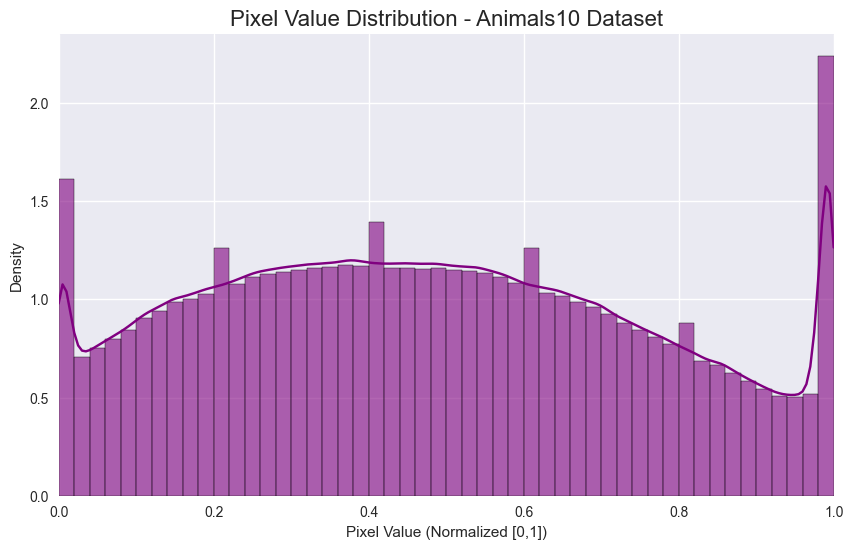


Pixel Value Statistics:
Number of pixels sampled: 12288000
Min pixel value: 0.000
Max pixel value: 1.000
Mean pixel value: 0.477
Median pixel value: 0.463
Standard deviation: 0.277


In [9]:
# Analyze pixel value distributions for Animals10 dataset
if DATASET_CHOICE == "animals10":
    print("Analyzing pixel value distributions...")
    
    # Collect pixel values from a subset of images
    pixel_values = []
    num_images_to_sample = 1000  # Number of images to sample for analysis
    images_collected = 0
    
    train_ds.reset()
    
    for i in range(len(train_ds)):
        batch_images, _ = next(train_ds)
        
        for img in batch_images:
            pixel_values.extend(img.flatten())
            images_collected += 1
            
            if images_collected >= num_images_to_sample:
                break
        
        if images_collected >= num_images_to_sample:
            break
    
    pixel_values = np.array(pixel_values)
    
    # Plot pixel value distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(pixel_values, bins=50, kde=True, color='purple', stat='density', alpha=0.6)
    plt.title('Pixel Value Distribution - Animals10 Dataset', fontsize=16)
    plt.xlabel('Pixel Value (Normalized [0,1])')
    plt.ylabel('Density')
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()
    
    # Print statistics
    print("\nPixel Value Statistics:")
    print(f"Number of pixels sampled: {len(pixel_values)}")
    print(f"Min pixel value: {np.min(pixel_values):.3f}")
    print(f"Max pixel value: {np.max(pixel_values):.3f}")
    print(f"Mean pixel value: {np.mean(pixel_values):.3f}")
    print(f"Median pixel value: {np.median(pixel_values):.3f}")
    print(f"Standard deviation: {np.std(pixel_values):.3f}")
    
    # Reset generator for future use
    train_ds.reset()


## 7. Key Insights and Preprocessing Strategy

### Observations:

**Dataset Characteristics:**
- Image dimensions: 
- Pixel values: 0-255 (uint8)
- Classes: not Balanced distribution

**Preprocessing Strategy:**
1. **Normalization**: Scale pixel values to [0,1] range
2. **Data Augmentation**: -- need to Apply rotation, flip, zoom, shift
3. **Train/Val Split**: Use 90/10 
4. **One-hot Encoding**: needs to be done?

**Next Steps:**
- Implement preprocessing pipeline
- Design custom CNN architecture
- Implement transfer learning approach
- Compare model performances

In [10]:
# Save key variables for next notebooks
print(f"Dataset choice: {DATASET_CHOICE}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
type(train_ds)

Dataset choice: animals10
Number of classes: 10
Class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


keras.src.preprocessing.image.DirectoryIterator

## Loading H5 Datasets

How to load the saved H5 datasets in other notebooks.

In [11]:
# Function to load H5 datasets
def load_h5_dataset(h5_path='../data/animals10_dataset.h5', config_path='../data/dataset_config.json'):
    """Load datasets from H5 file and configuration"""
    
    print(f"Loading dataset from {h5_path}...")
    
    # Load configuration
    with open(config_path, 'r') as f:
        config = json.load(f)
    
    # Load H5 data
    with h5py.File(h5_path, 'r') as f:
        # Load training data
        train_images = f['train/images'][:]
        train_labels = f['train/labels'][:]
        
        # Load validation data
        val_images = f['validation/images'][:]
        val_labels = f['validation/labels'][:]
        
        # Get metadata
        print(f"Dataset: {f.attrs['dataset_choice']}")
        print(f"Classes: {f.attrs['num_classes']}")
        print(f"Image size: {f.attrs['img_height']}x{f.attrs['img_width']}")
        print(f"Training samples: {f.attrs['train_samples']}")
        print(f"Validation samples: {f.attrs['val_samples']}")
    
    return (train_images, train_labels), (val_images, val_labels), config

# Function to convert back to TensorFlow datasets (if needed)
def create_tf_datasets_from_arrays(train_data, val_data, batch_size=32):
    """Convert numpy arrays back to tf.data.Dataset"""
    
    train_images, train_labels = train_data
    val_images, val_labels = val_data
    
    # Create TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
    
    # Add batching and shuffling
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return train_dataset, val_dataset

print("✅ H5 loading functions defined!")
print("\nExample usage for other notebooks:")
print("""
# Load the saved datasets:
import h5py
import json
import tensorflow as tf

# Method 1: Load as numpy arrays (memory efficient for small datasets)
(train_images, train_labels), (val_images, val_labels), config = load_h5_dataset()
class_names = config['class_names']

# Method 2: Convert to tf.data.Dataset (for training with TensorFlow)
train_dataset, val_dataset = create_tf_datasets_from_arrays(
    (train_images, train_labels), 
    (val_images, val_labels), 
    batch_size=32
)

# Now you can use train_dataset and val_dataset for model training!
""")

✅ H5 loading functions defined!

Example usage for other notebooks:

# Load the saved datasets:
import h5py
import json
import tensorflow as tf

# Method 1: Load as numpy arrays (memory efficient for small datasets)
(train_images, train_labels), (val_images, val_labels), config = load_h5_dataset()
class_names = config['class_names']

# Method 2: Convert to tf.data.Dataset (for training with TensorFlow)
train_dataset, val_dataset = create_tf_datasets_from_arrays(
    (train_images, train_labels), 
    (val_images, val_labels), 
    batch_size=32
)

# Now you can use train_dataset and val_dataset for model training!



In [12]:
# Test loading the H5 dataset
print("Testing H5 dataset loading...")

try:
    # Test loading
    (test_train_images, test_train_labels), (test_val_images, test_val_labels), loaded_config = load_h5_dataset()
    
    print("✅ Successfully loaded H5 dataset!")
    print(f"Training data shape: {test_train_images.shape}")
    print(f"Training labels shape: {test_train_labels.shape}")
    print(f"Validation data shape: {test_val_images.shape}")
    print(f"Validation labels shape: {test_val_labels.shape}")
    
    # Verify data integrity
    print(f"\nData integrity check:")
    print(f"  Original train samples: {train_ds.samples}")
    print(f"  Loaded train samples: {len(test_train_images)}")
    print(f"  Original val samples: {val_ds.samples}")
    print(f"  Loaded val samples: {len(test_val_images)}")
    
    # Check a few sample images
    print(f"  Sample pixel range: [{test_train_images.min():.3f}, {test_train_images.max():.3f}]")
    print(f"  Sample label shape: {test_train_labels[0].shape}")
    
    # Test TensorFlow dataset conversion
    test_train_ds, test_val_ds = create_tf_datasets_from_arrays(
        (test_train_images, test_train_labels),
        (test_val_images, test_val_labels),
        batch_size=32
    )
    
    # Test getting a batch
    sample_batch = next(iter(test_train_ds))
    print(f"  TF Dataset batch shape: {sample_batch[0].shape}")
    
    print("✅ All tests passed!")
    
except Exception as e:
    print(f"❌ Error testing H5 loading: {e}")

print("\n" + "="*60)
print("H5 FORMAT ADVANTAGES")
print("="*60)
print("✅ Efficient compression (gzip)")
print("✅ Cross-platform compatibility")
print("✅ Fast loading with h5py")
print("✅ Handles large datasets well")
print("✅ Preserves data types and shapes")
print("✅ Can store metadata as attributes")
print("✅ Works seamlessly with TensorFlow")
print("✅ Much smaller than pickle files")
print("✅ Industry standard for scientific data")

Testing H5 dataset loading...
Loading dataset from ../data/animals10_dataset.h5...
❌ Error testing H5 loading: [Errno 2] No such file or directory: '../data/dataset_config.json'

H5 FORMAT ADVANTAGES
✅ Efficient compression (gzip)
✅ Cross-platform compatibility
✅ Fast loading with h5py
✅ Handles large datasets well
✅ Preserves data types and shapes
✅ Can store metadata as attributes
✅ Works seamlessly with TensorFlow
✅ Much smaller than pickle files
✅ Industry standard for scientific data


Reading images from /Users/smithn5/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 26179/26179 [01:38<00:00, 265.45it/s]

100%|██████████| 26179/26179 [01:13<00:00, 353.89it/s]



Issue checks completed. 4038 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |         2023 |
|  1 | near_duplicates  |         1952 |
|  2 | blurry           |           32 |
|  3 | odd_aspect_ratio |           19 |
|  4 | dark             |            4 |
|  5 | low_information  |            4 |
|  6 | light            |            3 |
|  7 | grayscale        |            1 |
|  8 | exact_duplicates |            0 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 2023
Examples representing most severe instances of this issue:



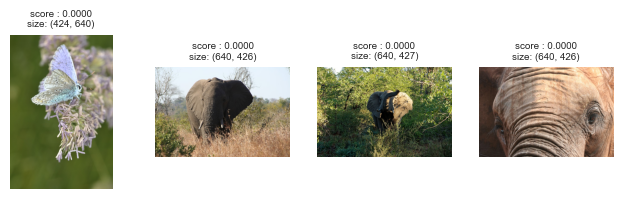

------------------ near_duplicates images ------------------

Number of examples with this issue: 1952
Examples representing most severe instances of this issue:

Set: 0
Set: 0


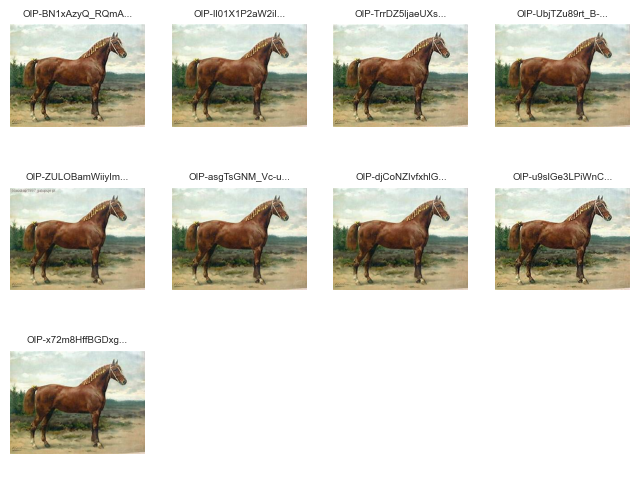

Set: 1


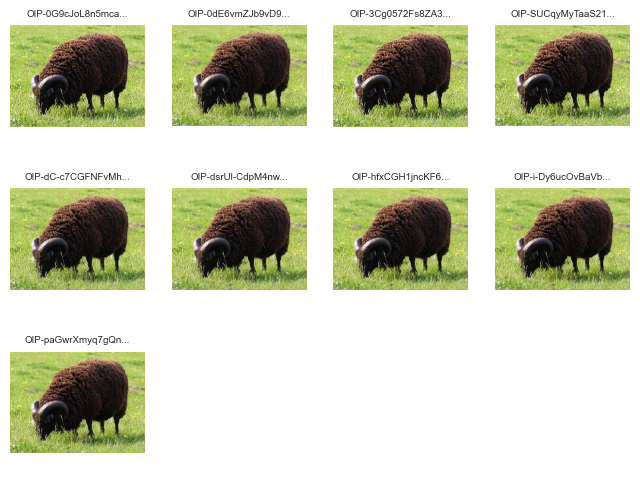

Set: 2


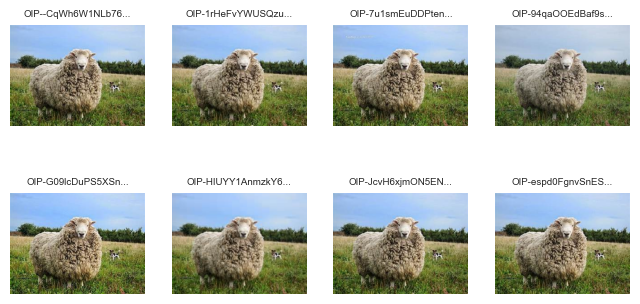

Set: 3


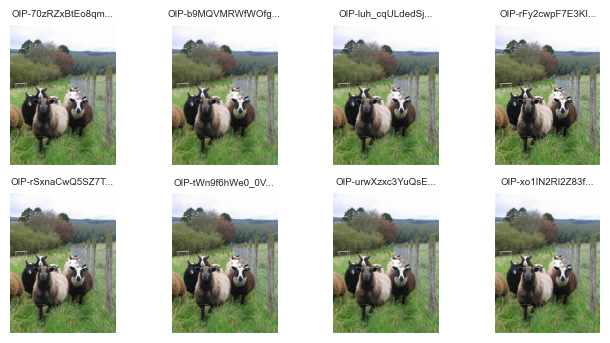

---------------------- blurry images -----------------------

Number of examples with this issue: 32
Examples representing most severe instances of this issue:



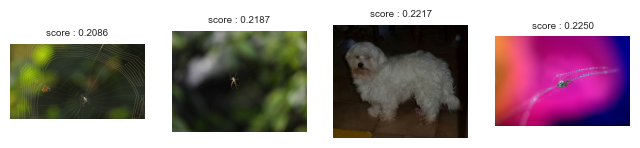

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 19
Examples representing most severe instances of this issue:



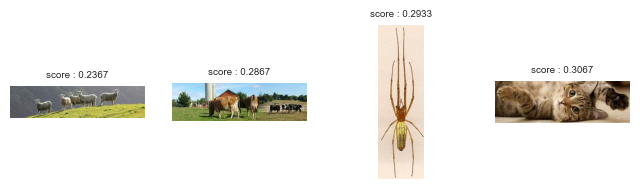

----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



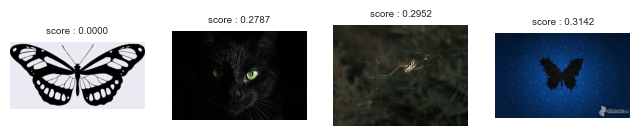

------------------ low_information images ------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



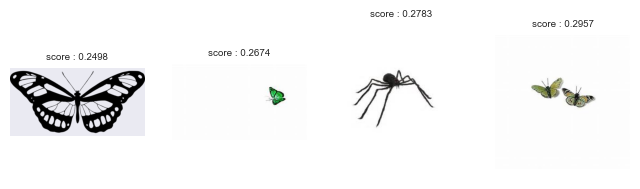

----------------------- light images -----------------------

Number of examples with this issue: 3
Examples representing most severe instances of this issue:



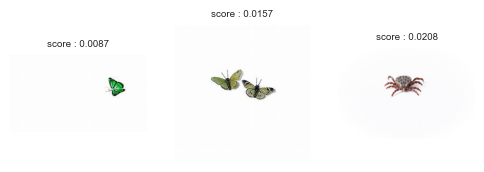

--------------------- grayscale images ---------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



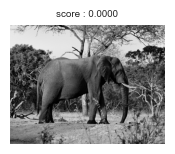

In [13]:
from cleanvision import Imagelab

# Specify path to folder containing the image files in your dataset
imagelab = Imagelab(data_path=os.path.join(path, 'raw-img'))

# Automatically check for a predefined list of issues within your dataset
imagelab.find_issues()

# Produce a neat report of the issues found in your dataset
imagelab.report()